In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
data = pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [52]:
data.shape

(2156270, 11)

In [53]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [54]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.156270e+06,2.156270e+06,2.156270e+06,2.156270e+06,2.156269e+06,2.156269e+06,2.156269e+06,2156269.0
mean,9.186595e+01,1.615956e+05,8.513746e+05,8.728053e+05,9.981166e+05,1.115083e+06,9.688031e-04,0.0
std,6.546740e+01,2.699292e+05,2.916156e+06,2.952424e+06,2.306967e+06,2.399223e+06,3.111053e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.100000e+01,1.318625e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,1.290000e+02,7.876521e+04,1.486800e+04,0.000000e+00,1.389721e+05,2.297291e+05,0.000000e+00,0.0
75%,1.560000e+02,2.172126e+05,1.191160e+05,1.608831e+05,9.500618e+05,1.151337e+06,0.000000e+00,0.0
max,1.840000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.228378e+07,4.265577e+07,1.000000e+00,0.0


In [55]:
#drop original and destination name
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [56]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [57]:
data.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

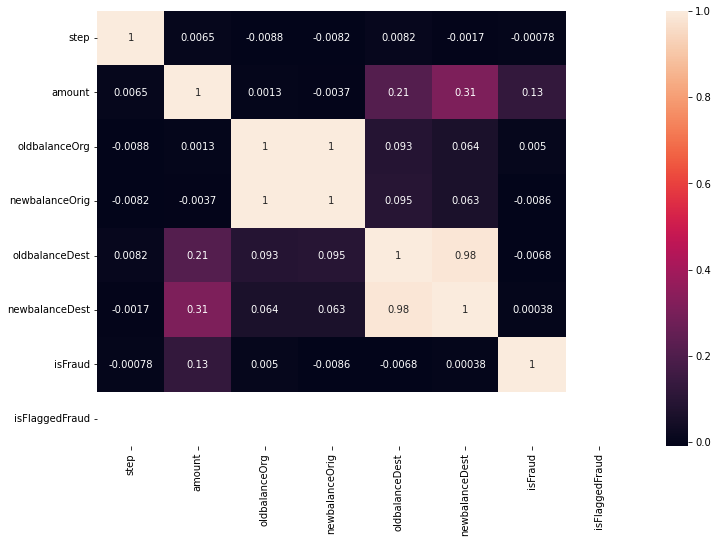

In [58]:
# checking the correlation between the variables with the target variable
data.corr()["isFraud"].sort_values()

# heatmap of the correlation between the variables with the target variable
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

In [59]:
data["isFraud"].value_counts()

0.0    2154180
1.0       2089
Name: isFraud, dtype: int64

In [60]:
# checking the payment type of the transactions
data["type"].value_counts()

CASH_OUT    769724
PAYMENT     718480
CASH_IN     474863
TRANSFER    178979
DEBIT        14224
Name: type, dtype: int64

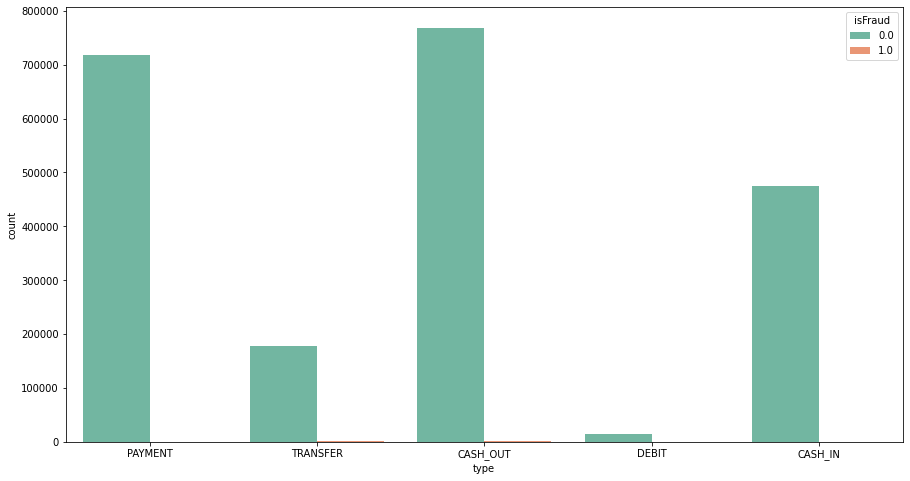

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(x="type", data=data,hue="isFraud" , palette="Set2")

In [62]:
#pie chart
from collections import Counter
c = Counter(data['type'])
dic = dict(c)
new_data = pd.DataFrame(dic.items(), columns= ['type', 'IsFraud'])

In [63]:
import plotly_express as px
pie = px.pie(new_data, values = "IsFraud", names = 'type', title = 'Fraudulent Transactions', color_discrete_sequence=px.colors.sequential.RdBu)
pie.show()

ModuleNotFoundError: ignored

In [64]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import plotly_express as px
pie = px.pie(new_data, values = "IsFraud", names = 'type', title = 'Fraudulent Transactions', color_discrete_sequence=px.colors.sequential.RdBu)
pie.show()